In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import xmltodict
import json
import urllib
from urllib.parse import urlparse
import httplib2 as http
from math import sin, cos, sqrt, atan2
import datetime
import warnings
import shapely.geometry as geom
from shapely.ops import cascaded_union
from shapely import wkt
from shapely.wkt import dumps
warnings.filterwarnings( 'ignore' )

In [56]:
#https://transportgeography.org/contents/methods/transportation-accessibility/#:~:text=Accessibility%20is%20the%20measure%20of,in%20the%20determination%20of%20accessibility.


In [57]:
routes = pd.read_csv('bus_routes.csv',dtype={"BusStopCode":"string"})
services = pd.read_csv('bus_services.csv')
stops = pd.read_csv('bus_stops.csv')
age = pd.read_csv('MVP01-3-4_Bus_by_age.csv')
housing = pd.read_csv('Singapore Housing Dataset.csv')


In [58]:
codes = stops['BusStopCode'] #set to 100 first so it doesn't take too long to run
codes = codes.sample(100)


 run it once only so my laptop doesnt die

In [61]:
jsonObj = []
now = datetime.datetime.now(datetime.timezone.utc)
if __name__ == "__main__":
    # Authentication parameters
    headers = {'AccountKey': 'Vgcffq/pSuO0TbmCUSHrsQ==',
               'accept': 'application/json'}

    for i in (codes.values):
        uri = 'http://datamall2.mytransport.sg/'
        path = 'ltaodataservice/BusArrivalv2'
        params = {'BusStopCode': i}
        target = uri + path + '?' + urllib.parse.urlencode(params)

        target = urlparse(target)
        print(target.geturl())
        method = 'GET'
        body = ''

        h = http.Http()
        response, content = h.request(
            target.geturl(),
            method,
            body,
            headers)

        jsonObj.append(json.loads(content))
    with open("bus_arrival(offpeak)api.json", "w") as outfile:
        json.dump(jsonObj, outfile, sort_keys=True,
                indent=4, ensure_ascii=False)



http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=41069
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=66589
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=4211
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=44591
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=44821
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=55221
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=64039
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=5189
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=67229
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=54439
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=21549
http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2?BusStopCode=11321
http://datamall2.mytransport.sg/ltaodataservice/BusArr

In [ ]:
# now
#datetime.datetime(2023, 2, 7, 10, 58, 52, 645319, tzinfo=datetime.timezone.utc)

In [ ]:

# loop one time for length of timings then one time for no of buses then 3 times for arrival timings


In [ ]:
# loop one time for length of timings then one time for no of buses then 3 times for arrival timings
timings = pd.read_json('bus_arrival(offpeak)api.json')
arrival_times = []
timings = timings.drop([0])
timings.reset_index(drop=True, inplace=True)
temp = []

for i in range(len(timings)):
    for o in range(len(timings['Services'][i])):
        temp.append(timings['Services'][i][o]['NextBus']['EstimatedArrival'])
    arrival_times.append(temp) #Use nested loop to get the estimated arrival times for each bus and store in list 
    temp = [] #arrival_times is a list of lists


In [ ]:
for i in range(len(arrival_times)):
    for o in range(len(arrival_times[i])):
            arrival_times[i][o] = datetime.datetime.strptime(arrival_times[i][o], '%Y-%m-%dT%H:%M:%S%z')
            arrival_times[i][o] = arrival_times[i][o] - now
        #convert to seconds and calculate time diff



In [ ]:
for i in arrival_times:
    for o in range(len(i)):
        i[o] = i[o].seconds
        if i[o] > 10000:
            i[o] = 0
        i[o] = i[o] / 60
#check for weird values 
# (caused by buses that have already arrived within the time it took to run code)
#replace weird values with 0
#convert arrival timing to minutes
arrival_times = [item for sublist in arrival_times for item in sublist]


In [ ]:
# loop one time for length of timings then one time for no of buses then 3 times for arrival timings
timings = pd.read_json('bus_arrivalapi.json')
now = datetime.datetime(2023, 2, 7, 10, 58, 52, 645319, tzinfo=datetime.timezone.utc)
arrival_times2 = []
timings = timings.drop([0])
timings.reset_index(drop=True, inplace=True)
temp = []

for i in range(len(timings)):
    for o in range(len(timings['Services'][i])):
        temp.append(timings['Services'][i][o]['NextBus']['EstimatedArrival'])
    arrival_times2.append(temp) #Use nested loop to get the estimated arrival times for each bus and store in list 
    temp = [] #arrival_times is a list of lists

for i in range(len(arrival_times2)):
    for o in range(len(arrival_times2[i])):
            arrival_times2[i][o] = datetime.datetime.strptime(arrival_times2[i][o], '%Y-%m-%dT%H:%M:%S%z')
            arrival_times2[i][o] = arrival_times2[i][o] - now
        #convert to seconds and calculate time diff

for i in arrival_times2:
    for o in range(len(i)):
        i[o] = i[o].seconds
        if i[o] > 10000:
            i[o] = 0
        i[o] = i[o] / 60
#check for weird values 
# (caused by buses that have already arrived within the time it took to run code)
#replace weird values with 0
#convert arrival timing to minutes
arrival_times2 = [item for sublist in arrival_times2 for item in sublist]




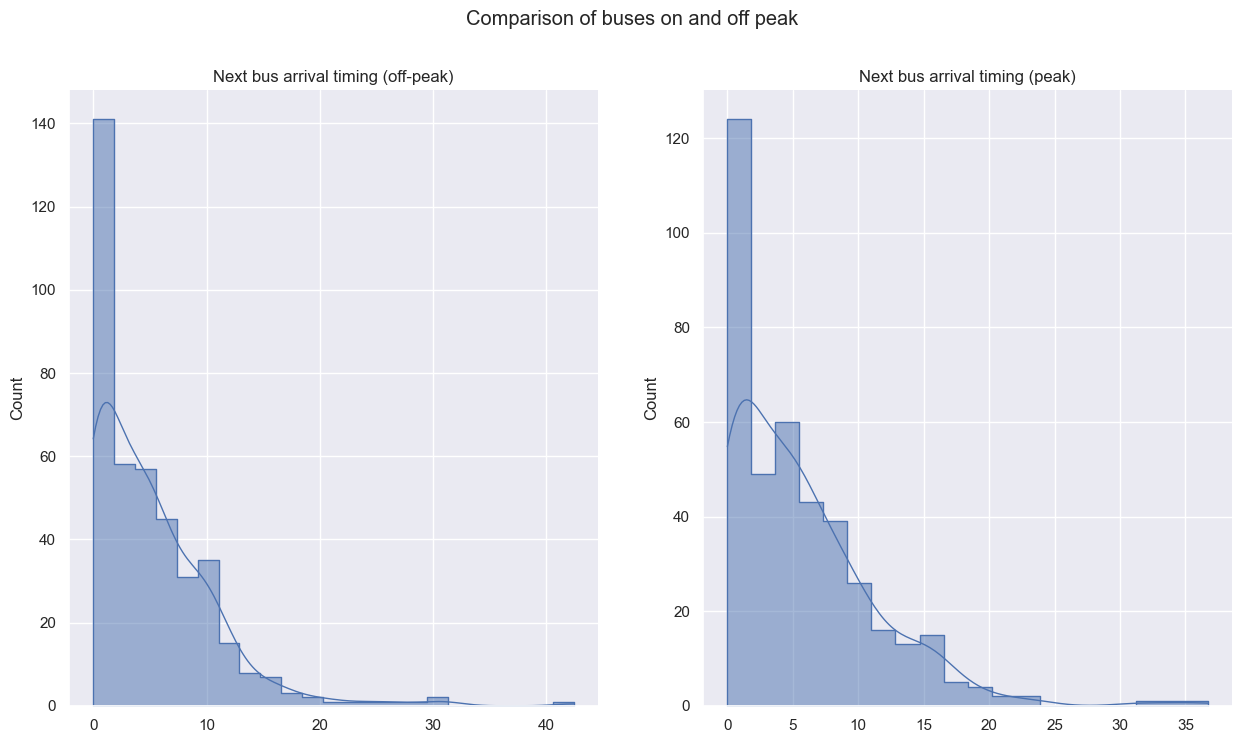

In [62]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Comparison of buses on and off peak')

sns.histplot(data=arrival_times, kde = True, element="step", ax = axes[0])
axes[0].set_title('Next bus arrival timing (off-peak)')

sns.histplot(data=arrival_times2, kde = True, element="step", ax = axes[1])
axes[1].set_title('Next bus arrival timing (peak)')

sns.despine()

plt.show()




In [ ]:
# timings = pd.read_json('bus_arrivalapi.json')
# arrival_times = []
# timings = timings.drop([0])
# temp = []
# now = datetime.datetime.now(datetime.timezone.utc)
# for i in range(len(timings['Services'])):
#     i = i+1
#     if timings['Services'][i] == [] or timings['Services'][i] == None:
#         arrival_times.append({timings['BusStopCode'][i]: [None,None,None]})
#     else:
#         for buses in ("NextBus", "NextBus2", "NextBus3"):
#             if timings['Services'][i][0][buses]['EstimatedArrival']:
#                 temp.append(datetime.datetime.strptime((timings['Services'][i][0][buses]['EstimatedArrival']), '%Y-%m-%dT%H:%M:%S%z') - now)
#             else:
#                 temp.append(None)
#         arrival_times.append({timings['BusStopCode'][i]: temp})
#         temp = []

# print(arrival_times)


In [ ]:
# df = pd.DataFrame(arrival_times)
# df = pd.melt(df, var_name='measurement_id', value_name='timestamp')
# df = df.dropna()
# df.reset_index(drop=True, inplace=True)
# df
# split_values = [str(value).split(',') for value in df['timestamp']]
# df2 = pd.DataFrame(split_values, columns=['day_offset1', 'seconds1', 'microseconds1','day_offset2', 'seconds2', 'microseconds2','day_offset3', 'seconds3', 'microseconds3'])

# result = df.join(df2, how="outer")
# result

# result['bustime1'] = result['day_offset1'] + pd.to_timedelta(result['seconds1']) + pd.to_timedelta(result['microseconds1'])
# result['bustime2'] = result['day_offset2'] + pd.to_timedelta(result['seconds2']) + pd.to_timedelta(result['microseconds2'])
# result['bustime3'] = result['day_offset3'] + pd.to_timedelta(result['seconds3']) + pd.to_timedelta(result['microseconds3'])
# result = result.drop(['day_offset1', 'seconds1', 'microseconds1', 'day_offset2', 'seconds2', 'microseconds2', 'day_offset3', 'seconds3', 'microseconds3'], axis=1)




In [ ]:
# df['timestamp']
# # df[['bus1','bus2','bus3']] = 
# # df["timestamp"].str.split(",", expand=True)
# df['timestamp']


In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})


In [ ]:
#drop empty unnamed column
stops.drop (['Unnamed: 0'], axis=1, inplace=True)
routes.drop (['Unnamed: 0'], axis=1, inplace=True)


In [ ]:
df = gpd.read_file('master-plan-2019-subzone-boundary-no-sea-geojson.geojson')

df['Region'] = [(xmltodict.parse(i))['center']['table']['tr'][7]['td'] for i in df.Description]
df.Description = [(xmltodict.parse(i))['center']['table']['tr'][5]['td'] for i in df.Description]
polygonny = df


In [ ]:
stops['gcs'] = stops.apply(lambda x: (x['Latitude'], x['Longitude']), axis=1)
geodf = gpd.GeoDataFrame(stops, geometry=gpd.points_from_xy(stops.Longitude, stops.Latitude))

sjoin = gpd.sjoin(geodf, df, how="inner", op='within')

sjoin.head(10)


BusStopCode             RoadName        Description_left  Latitude  \
0             481         Woodlands Rd  BT PANJANG TEMP BUS PK  1.383764   
2025        43991         Woodlands Rd            OPP BLK 635A  1.386207   
2032        44041         Woodlands Rd   Ten Mile Junction Stn  1.380951   
2034        44051         Woodlands Rd          Opp Blk 632 CP  1.384408   
2036        44061         Woodlands Rd     Bef Yew Tee Flyover  1.387925   
2046        44111  Choa Chu Kang Ave 1             Opp Blk 203  1.380941   
2048        44121    Choa Chu Kang Way                 Blk 113  1.377698   
2050        44131     Choa Chu Kang Rd                  Blk 26  1.377101   
2052        44141     Choa Chu Kang Rd             Phoenix Stn  1.378356   
2078        44271        Teck Whye Ave          Bet Blks 13/14  1.378671   

       Longitude                                     gcs  \
0     103.758300                    (1.383764, 103.7583)   
2025  103.756500                    (1.386207, 103.7565)   
2032  103.760370    (1.3809505774787, 103.7603697770399)   
2034  103.758020   (1.38440811744123, 103.7580197670318)   
2036  103.755386   (1.38792499938306, 103.7553863903753)   
2046  103.749752   (1.38094121398036, 103.7497522420396)   
2048  103.750936  (1.37769846227758, 103.75093552549583)   
2050  103.755322  (1.37710069702793, 103.75532192967428)   
2052  103.757737  (1.37835602806756, 103.75773677895587)   
2078  103.756148  (1.37867114732017, 103.75614774814444)   

                       geometry  index_right     Name Description_right  \
0     POINT (103.75830 1.38376)          243  kml_244     CHOA CHU KANG   
2025  POINT (103.75650 1.38621)          243  kml_244     CHOA CHU KANG   
2032  POINT (103.76037 1.38095)          243  kml_244     CHOA CHU KANG   
2034  POINT (103.75802 1.38441)          243  kml_244     CHOA CHU KANG   
2036  POINT (103.75539 1.38792)          243  kml_244     CHOA CHU KANG   
2046  POINT (103.74975 1.38094)          243  kml_244     CHOA CHU KANG   
2048  POINT (103.75094 1.37770)          243  kml_244     CHOA CHU KANG   
2050  POINT (103.75532 1.37710)          243  kml_244     CHOA CHU KANG   
2052  POINT (103.75774 1.37836)          243  kml_244     CHOA CHU KANG   
2078  POINT (103.75615 1.37867)          243  kml_244     CHOA CHU KANG   

           Region  
0     WEST REGION  
2025  WEST REGION  
2032  WEST REGION  
2034  WEST REGION  
2036  WEST REGION  
2046  WEST REGION  
2048  WEST REGION  
2050  WEST REGION  
2052  WEST REGION  
2078  WEST REGION

In [ ]:
result = sjoin.groupby('Description_right').count()
result['Description'] = result.index
result = result[['Description', 'gcs']]
df = df.merge(result, on="Description", how="left")
# result


In [ ]:
result = []
for i in df.Description.unique():
    mask = df['Description'] == i

    selected_rows = df.loc[mask]
    result.append(cascaded_union(selected_rows['geometry']))


result_df = gpd.GeoDataFrame(geometry=result)
result_df['Description'] = df.Description.unique()

In [ ]:
temp = df[['Description','Region','gcs']]
temp.drop_duplicates(subset="Description", keep="last", inplace=True)
result_df = pd.merge(result_df, temp, on='Description', how='left')

In [ ]:
result_df['area'] = 0

for i, row in result_df.iterrows():
    polygon = geom.shape(row["geometry"])
    result_df.at[i, "area"] = ((polygon.area))

# Calculate the bus stops per sqkm by dividing the "gcs" column by the "area" column
result_df["bus_stops_per_sqkm"] = result_df["gcs"] / (result_df["area"]*((111)**2))


In [ ]:
result_df

geometry  \
0   POLYGON Z ((103.88025 1.28386 0.00000, 103.880...   
1   POLYGON Z ((103.84203 1.29426 0.00000, 103.842...   
2   POLYGON Z ((103.85082 1.28630 0.00000, 103.850...   
3   MULTIPOLYGON Z (((103.74134 1.15997 0.00000, 1...   
4   POLYGON Z ((103.84955 1.29246 0.00000, 103.849...   
5   POLYGON Z ((103.89864 1.29537 0.00000, 103.898...   
6   MULTIPOLYGON Z (((103.83332 1.21666 0.00000, 1...   
7   POLYGON Z ((103.82358 1.26013 0.00000, 103.823...   
8   POLYGON Z ((103.84476 1.27262 0.00000, 103.844...   
9   POLYGON Z ((103.86269 1.26976 0.00000, 103.859...   
10  POLYGON Z ((103.76599 1.29341 0.00000, 103.766...   
11  POLYGON Z ((103.84876 1.28207 0.00000, 103.849...   
12  POLYGON Z ((103.86473 1.28885 0.00000, 103.869...   
13  POLYGON Z ((103.85435 1.30224 0.00000, 103.854...   
14  POLYGON Z ((103.86527 1.29480 0.00000, 103.865...   
15  POLYGON Z ((103.82915 1.29898 0.00000, 103.829...   
16  POLYGON Z ((103.84839 1.30484 0.00000, 103.848...   
17  POLYGON Z ((103.76758 1.29191 0.00000, 103.767...   
18  POLYGON Z ((103.93193 1.30537 0.00000, 103.931...   
19  POLYGON Z ((103.68153 1.30947 0.00000, 103.681...   
20  MULTIPOLYGON Z (((103.71185 1.29736 0.00000, 1...   
21  POLYGON Z ((103.83942 1.30158 0.00000, 103.839...   
22  POLYGON Z ((103.88982 1.30824 0.00000, 103.889...   
23  POLYGON Z ((103.69507 1.30784 0.00000, 103.695...   
24  POLYGON Z ((103.79121 1.31133 0.00000, 103.791...   
25  POLYGON Z ((103.85112 1.31839 0.00000, 103.850...   
26  POLYGON Z ((103.85548 1.32913 0.00000, 103.855...   
27  MULTIPOLYGON Z (((103.64803 1.23965 0.00000, 1...   
28  POLYGON Z ((103.70670 1.32777 0.00000, 103.705...   
29  POLYGON Z ((103.88288 1.34351 0.00000, 103.882...   
30  POLYGON Z ((103.86042 1.34344 0.00000, 103.860...   
31  POLYGON Z ((103.98347 1.31670 0.00000, 103.982...   
32  POLYGON Z ((103.76420 1.34502 0.00000, 103.765...   
33  POLYGON Z ((103.89516 1.33670 0.00000, 103.894...   
34  MULTIPOLYGON Z (((104.07175 1.29188 0.00000, 1...   
35  POLYGON Z ((103.89816 1.34738 0.00000, 103.898...   
36  POLYGON Z ((103.84297 1.36429 0.00000, 103.842...   
37  POLYGON Z ((103.96356 1.35477 0.00000, 103.963...   
38  POLYGON Z ((103.79130 1.34917 0.00000, 103.790...   
39  POLYGON Z ((103.73662 1.34642 0.00000, 103.736...   
40  MULTIPOLYGON Z (((103.88601 1.40127 0.00000, 1...   
41  POLYGON Z ((103.77444 1.39029 0.00000, 103.771...   
42  POLYGON Z ((103.82580 1.39292 0.00000, 103.825...   
43  POLYGON Z ((103.80563 1.41440 0.00000, 103.805...   
44  POLYGON Z ((103.91889 1.39325 0.00000, 103.918...   
45  POLYGON Z ((103.74614 1.37117 0.00000, 103.745...   
46  POLYGON Z ((103.91632 1.38360 0.00000, 103.916...   
47  POLYGON Z ((103.99361 1.39155 0.00000, 103.993...   
48  POLYGON Z ((103.80702 1.41126 0.00000, 103.807...   
49  POLYGON Z ((103.82438 1.43506 0.00000, 103.824...   
50  MULTIPOLYGON Z (((103.69700 1.35404 0.00000, 1...   
51  POLYGON Z ((103.80129 1.42971 0.00000, 103.799...   
52  MULTIPOLYGON Z (((104.05483 1.43133 0.00000, 1...   
53  MULTIPOLYGON Z (((103.86420 1.43424 0.00000, 1...   
54  POLYGON Z ((103.72246 1.45116 0.00000, 103.724...   

                Description             Region    gcs      area  \
0               MARINA EAST     CENTRAL REGION    NaN  0.000150   
1              RIVER VALLEY     CENTRAL REGION   14.0  0.000120   
2           SINGAPORE RIVER     CENTRAL REGION   21.0  0.000078   
3           WESTERN ISLANDS        WEST REGION    NaN  0.003723   
4                    MUSEUM     CENTRAL REGION   19.0  0.000067   
5             MARINE PARADE     CENTRAL REGION   57.0  0.000498   
6          SOUTHERN ISLANDS     CENTRAL REGION    4.0  0.000579   
7               BUKIT MERAH     CENTRAL REGION  176.0  0.001175   
8             DOWNTOWN CORE     CENTRAL REGION   76.0  0.000413   
9              STRAITS VIEW     CENTRAL REGION    4.0  0.000092   
10               QUEENSTOWN     CENTRAL REGION  223.0  0.001762   
11                   OUTRAM     CENTRAL REGION  

In [68]:
fig = px.choropleth_mapbox(result_df, geojson=result_df.geometry, locations=result_df.index, color='bus_stops_per_sqkm',
                            hover_name= 'Description',
                            hover_data=['gcs','Region'],
                            color_continuous_scale="Blues",
                            mapbox_style="carto-positron",
                            zoom=10, center = {"lat": 1.3521, "lon": 103.8198},
                            opacity=0.8,
                            labels={'gcs':'Number of Bus Stops'}
                            )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# app = dash.Dash(__name__)

# app.layout = html.Div(children=[
#     html.H1('Concentration of Bus Stops in Singapore'),
#     dcc.Graph(
#         id='example-graph',
#         figure=fig
#     )
# ])

# if __name__ == '__main__':
#     print("AWDNOAUW")
#     app.run_server(debug=True, use_reloader=False)

# #print link of the app
# print('http://ame:8050'.format(name=name))

# !curl http://ame:8050/

In [ ]:
# app = JupyterDash(__name__)
# app.layout = html.Div([dcc.Graph(figure=fig)])

# @app.callback(
#     Output('graph', 'figure'),
#     [Input("colorscale-dropdown", "value")]
# )
# def update_figure(colorscale):
#     return px.scatter(
#         df, x="total_bill", y="tip", color="size",
#         color_continuous_scale=colorscale,
#         render_mode="webgl", title="Tips"
#     )

# app.run_server(mode='inline')

In [ ]:
heat = age
heat['age_years'] = pd.Categorical(heat['age_years'], categories=['0-<1', 
'1-<2', '2-<3', '3-<4', '4-<5', '5-<6', '6-<7'
, '7-<8', '8-<9', '9-<10', '10-<11', '11-<12', '12-<13', 
'13-<14', '14-<15', '15-<16', '16-<17', '17-<18', '18-<19', 
'19-<20', '20->'], ordered=True)
heat = heat.pivot(index='year', columns='age_years', values='number')


In [ ]:
#https://www.sciencedirect.com/science/article/pii/S1877705816000412/pdf?crasolve=1&r=7954e1124dbb4a9b&ts=1675696924543&rtype=https&vrr=UKN&redir=UKN&redir_fr=UKN&redir_arc=UKN&vhash=UKN&host=d3d3LnNjaWVuY2VkaXJlY3QuY29t&tsoh=d3d3LnNjaWVuY2VkaXJlY3QuY29t&iv=5ecf614ab365a54b42646a11539de711&token=36393538356338626234326163373862666631353632666563343764346131383332343733316631393166663465303266653935623535326135386237343463313238343437366663393062393963636638623762393231343364363a383433383664303661616237376233346631383931396130&text=847c52b7c12710d5b152a39b93ad46f7ce0a00db0ab77e8f3dc03331c57792eaf5df9af1168502dc28456e29dc79627d85b91be39e9608722466084047da73966ea8348701941a8d4e852a3d36ab06473436775a0fa72524f9f9d2a92463a123a8b603f32b94a9611cc52ef547ebbfcebba63ba882853ff20ee27594daaf9baac2a42bd42b9d5f203b64a74be696b95b5920392fe756d8c250209bf43972b574c0818a92bc96792e4d23c6208c7aefb4c56d9cae3003610fee410b47f4f3c1a633d42757a04e7c172408dba32840525f019f9f2759509227d2ce95ec61e89c3a5dda89f1099dc0c7ef64f0aa9aea1924c9315ddb71c50afdf73a835a3cb10999edb214f4c5f686a2b7b4e6c1dbbcd3a998a6e242292153b2e2b250538a531cc4d0e14bed306a9655a24efb943c1550fb&original=3f6d64353d6430366531383864623336646262343430343436353835613739353236633232267069643d312d73322e302d53313837373730353831363030303431322d6d61696e2e706466

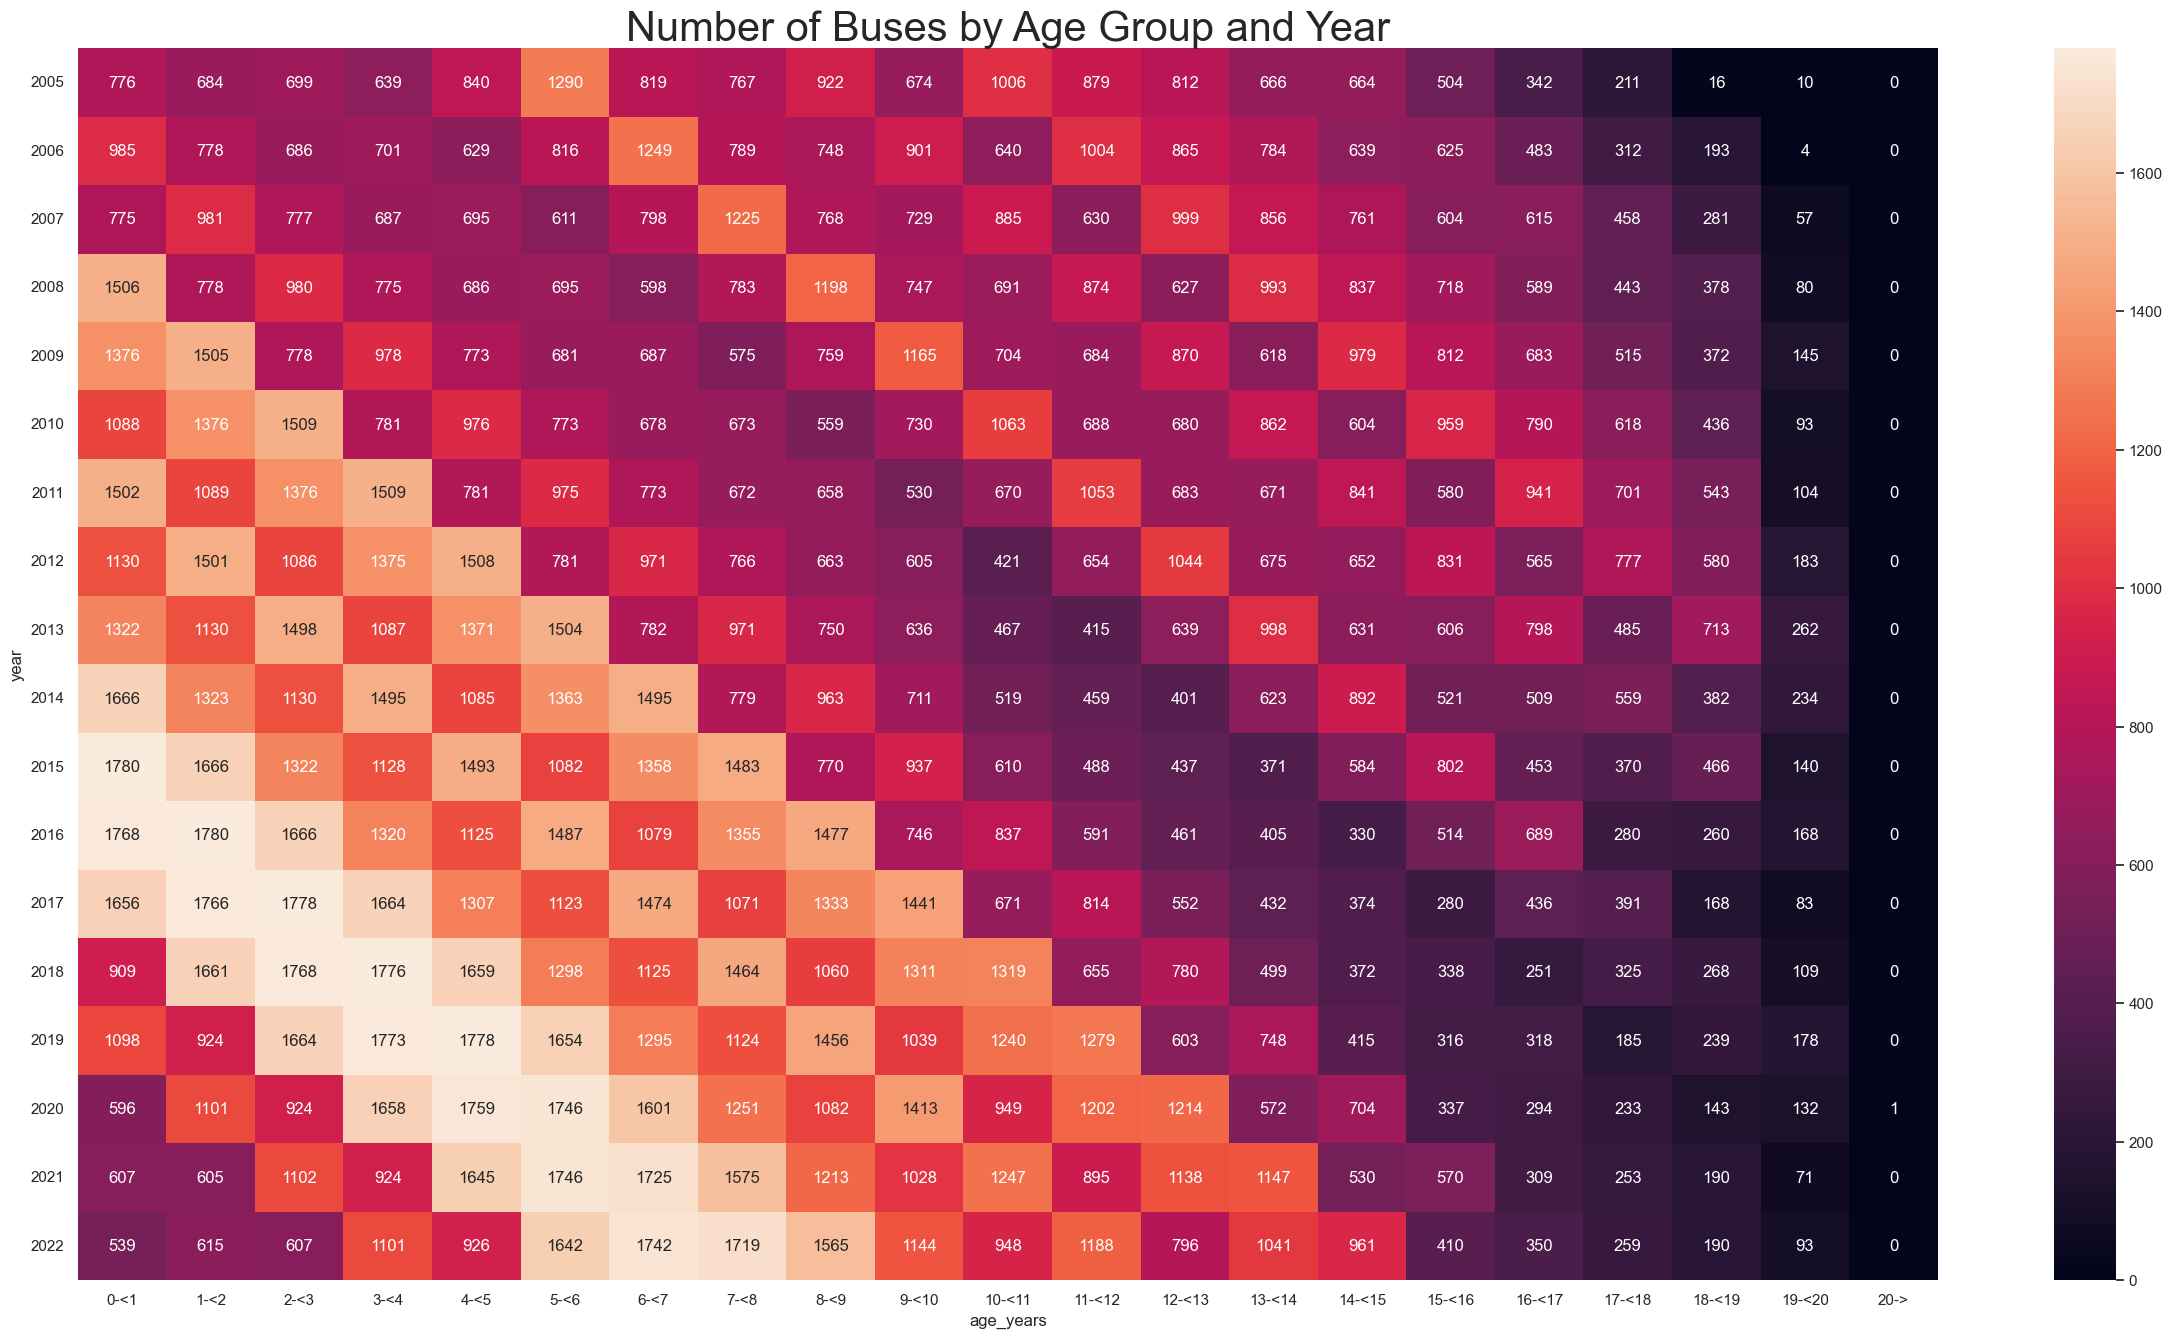

In [ ]:
sns.set(rc={'figure.figsize':(30,16)})

plt.title('Number of Buses by Age Group and Year', fontsize=30)
sns.heatmap(heat, annot=True, fmt="d")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


In [ ]:
# capacity = capacity.sort_values(by=['number'], ascending=True)
# sns.set(rc={'figure.figsize':(15,8)})

# fig = px.histogram(capacity, x="capacity", y="number", animation_frame="year"
#                 , animation_group="capacity"
#                 , color="capacity"
#                 , range_y =(0, 8000)
#                 , hover_name="capacity", labels={"capacity": "Capacity"}, height = 900, category_orders = {"capacity": (capacity.sort_values(by=['number'], ascending=False))['capacity'].unique()})

# updatemenu = dict(type="buttons", showactive=True)

# fig.update_layout(updatemenus=[updatemenu])

# fig.show()


 https://sgtransportcritic.wordpress.com/2021/11/23/basics-route-types/

In [ ]:
housing = housing[['year','longitude','latitude','flat_model','lease_start','street_name']]
housing = gpd.GeoDataFrame(housing, geometry=gpd.points_from_xy(housing.longitude, housing.latitude))
housingzone = gpd.sjoin(housing, df, how="inner", predicate='intersects')
housingzone.drop(columns = ['index_right','gcs'], inplace = True)
housingzone['old/new'] = housingzone['lease_start'].apply(lambda x: 'old' if x < 2000 else 'new')
housingzone['count'] = housingzone.groupby('street_name')['street_name'].transform('count')
housingzone = housingzone.drop_duplicates(subset = 'street_name')

In [ ]:
housingzone.value_counts('old/new')

old/new
old    472
new    100
dtype: int64

In [ ]:
regionsort = sjoin

In [ ]:
sjoin = sjoin[['Longitude','Latitude','RoadName','Description_right','Region','geometry']]
sjoin[['flat_model','old/new']] = 'Bus'
sjoin['count'] = 400
sjoin[['year','lease_start','Name']] = 0
sjoin.columns = ['longitude','latitude','street_name','Description','Region','geometry','flat_model','old/new','count','year','lease_start','Name']


In [ ]:
routes = routes.replace('-', np.NAN, regex=True)
routes=routes.reset_index(drop="True")
routes = routes.dropna()
routes

ServiceNo Operator  Direction  StopSequence BusStopCode  Distance  \
0            10     SBST          1             1       75009       0.0   
1            10     SBST          1             2       76059       0.6   
2            10     SBST          1             3       76069       1.1   
3            10     SBST          1             4       96289       2.3   
4            10     SBST          1             5       96109       2.7   
...         ...      ...        ...           ...         ...       ...   
25813       CT8     SBST          2            17       54191      16.3   
25814       CT8     SBST          2            18       54201      16.6   
25815       CT8     SBST          2            19       55131      16.9   
25816       CT8     SBST          2            20       55141      17.2   
25817       CT8     SBST          2            21       55151      17.6   

      WD_FirstBus WD_LastBus SAT_FirstBus SAT_LastBus SUN_FirstBus SUN_LastBus  
0            0500       2300         0500        2300         0500        2300  
1            0502       2302         0502        2302         0502        2302  
2            0504       2304         0504        2304         0503        2304  
3            0508       2308         0508        2309         0507        2308  
4            0509       2310         0509        2311         0508        2309  
...           ...        ...          ...         ...          ...         ...  
25813        1143       1745         1142        2243         1141        2243  
25814        1143       1746         1142        2243         1142        2243  
25815        1144       1747         1143        2244         1142        2244  
25816        1145       1748         1144        2245         1143        2245  
25817        1146       1749         1145        2246         1144        2246  

[20395 rows x 12 columns]

In [ ]:
housingzone['gcs'] = housingzone.apply(lambda x: (x['latitude'], x['longitude']), axis=1)
house = gpd.GeoDataFrame(housingzone, geometry=gpd.points_from_xy(housingzone.longitude, housingzone.latitude))


In [ ]:
arrayofdf = {}
arrayofhse = {}
uregions = list(regionsort['Description_right'].unique())
houseregion = house['Description'].unique()
common = list(np.intersect1d(houseregion, uregions))

for i in houseregion:
    arrayofdf[i] = regionsort[regionsort['Description_right'] == i].reset_index(drop=True)
    arrayofhse[i] = house[house['Description'] == i].reset_index(drop=True)

In [ ]:
#dont run this code as it takes a fairly long time to run
# 
#  def calculate_distance(lat1, lon1, lat2, lon2):
#     R = 6371
#     lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
#     return R * c

# threshold_distance = 0.3#in km?? not sure
# distances = pd.DataFrame(columns=['index1', 'index2', 'distance'])
# for k in common:
#     print(k)
#     for i in range(len(arrayofhse[k])):
#         lat1 = arrayofhse[k].iloc[i]['latitude']
#         lon1 = arrayofhse[k].iloc[i]['longitude']
#         for j in range(len(arrayofdf[k])):
#             lat2 = arrayofdf[k].iloc[j]['Latitude']
#             lon2 = arrayofdf[k].iloc[j]['Longitude']
#             distance = calculate_distance(lat1, lon1, lat2, lon2)
#             distances = distances.append({'index1': arrayofhse[k].iloc[i]['street_name'], 'index2': arrayofdf[k].iloc[j]['BusStopCode'], 'distance': distance}, ignore_index=True)

# samples.to_csv('samples.csv', index=False)
# distances = distances[distances['distance'] <= threshold_distance]
# distances.to_csv('distances.csv', index=False)

In [ ]:
distances = pd.read_csv('distances.csv')

In [ ]:


grouped = distances.groupby("index1")["index2"].apply(list)
distances = distances.drop_duplicates(subset='index1', keep='last')
distances["stops"] = grouped.tolist()
distances = distances.drop(columns=['index2', 'distance'])
distances = distances.reset_index(drop=True)
distances.columns = ['street_name', 'stops']
merged_df = pd.merge(housingzone, distances, on='street_name', how='inner')
merged_df['no_of_stops'] = merged_df['stops'].apply(lambda x: len(x))

In [ ]:
testing = merged_df
testing['Towns'] = testing['Description'].apply(lambda x: 'old' if x == 'TOA PAYOH' else 'new' if x =='PUNGGOL' else 'others')

In [ ]:
sample = pd.concat ([testing[testing['Description'] == 'TOA PAYOH'], testing[testing['Description'] == 'PUNGGOL']])
sample = sample.reset_index(drop=True)
sample['total_bus'] = 0

In [ ]:
for i in range(len(sample)):
    total = []
    for j in range(len(sample.loc[i]['stops'])):
        if(len(str(sample.loc[i]['stops'][j])) == 4):
            total.append(list(routes[routes['BusStopCode'] == '0' + str(sample.loc[i]['stops'][j])]['ServiceNo']))
        else:
            total.append(list(routes[routes['BusStopCode'] == str(sample.loc[i]['stops'][j])]['ServiceNo']))
    sample['total_bus'][i] = total

    

In [ ]:
#filter out unique buses only to determine how many routes are accessible for each area

for i in range(len(sample)):
    result = []
    for lst in sample['total_bus'][i]:
        result.extend(lst)
    sample['total_bus'][i] = list(set(result))

sample['no_of_bus'] = sample['total_bus'].apply(lambda x: len(x))

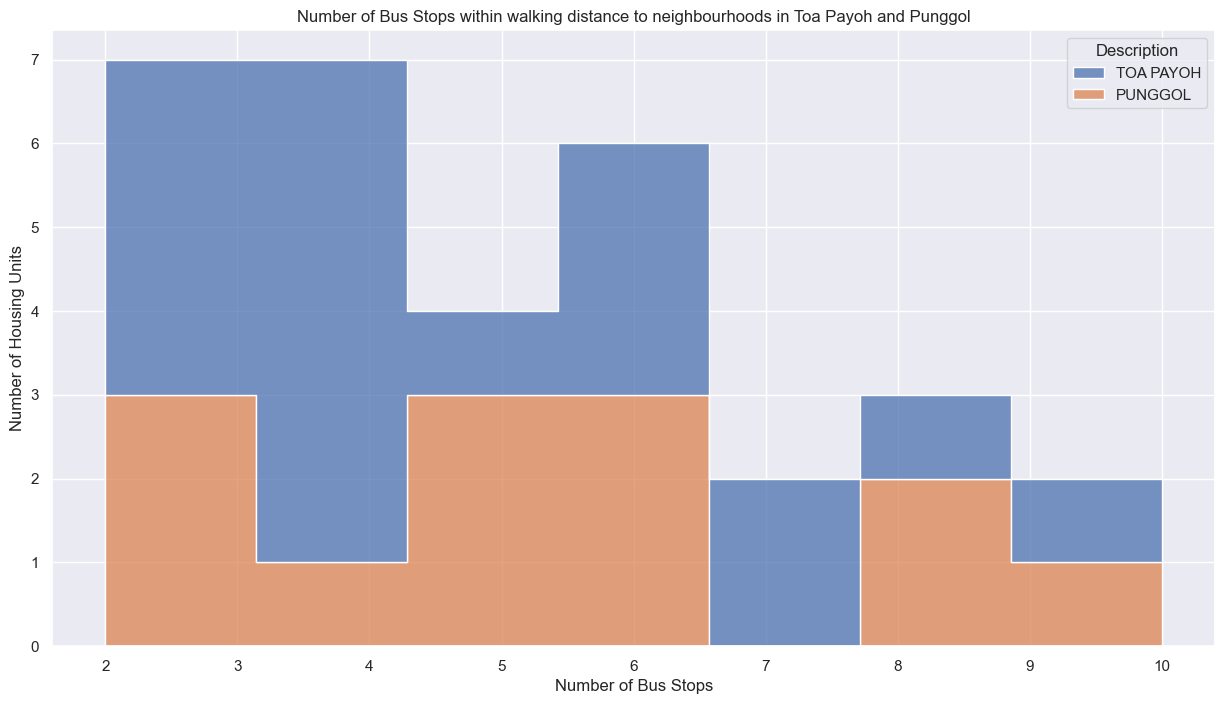

In [ ]:
# sns.histplot(x='no_of_stops', data=sample, binwidth=1, kde = True, hue = 'Description',element = 'step')
fig = plt.figure(figsize=(15, 8))
sns.histplot(x='no_of_stops', data=sample, hue = 'Description', element = 'step', multiple = 'stack')

plt.title('Number of Bus Stops within walking distance to neighbourhoods in Toa Payoh and Punggol')
plt.xlabel('Number of Bus Stops')
plt.ylabel('Number of Housing Units')
plt.show()

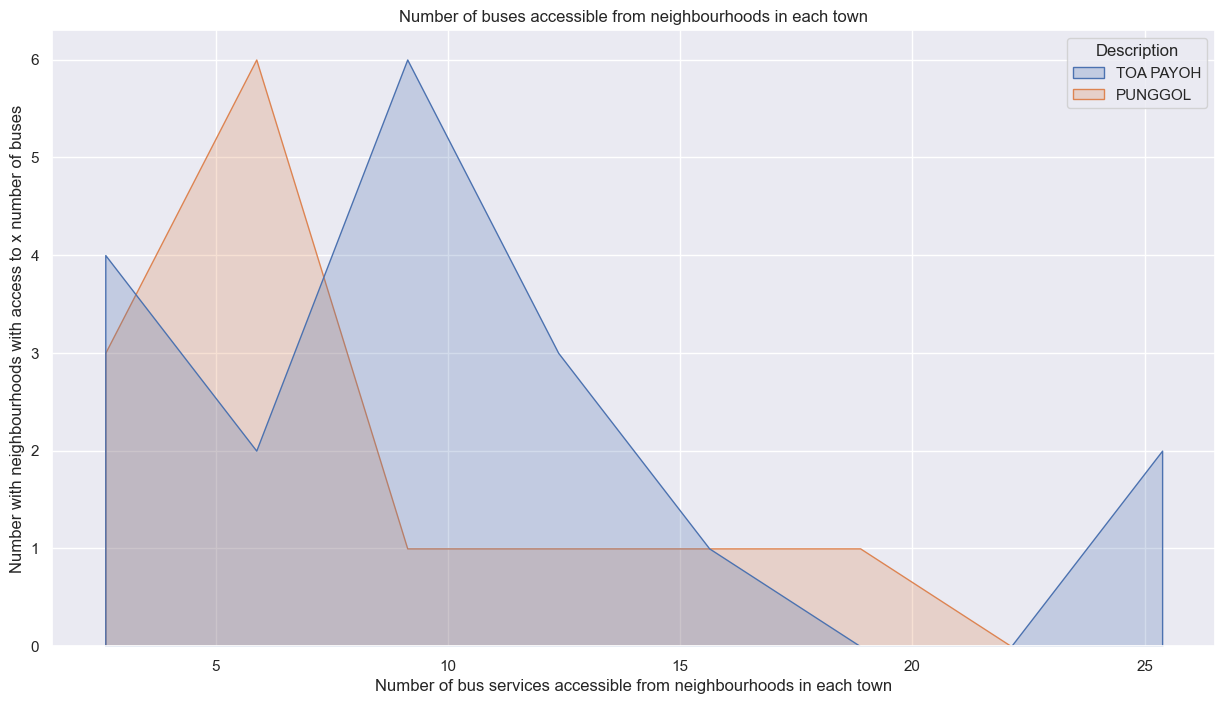

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.histplot(x='no_of_bus', data=sample, hue = 'Description',element = 'poly')

plt.title('Number of buses accessible from neighbourhoods in each town')
plt.xlabel('Number of bus services accessible from neighbourhoods in each town')
plt.ylabel('Number with neighbourhoods with access to x number of buses')
# Show the plot
plt.show()

In [ ]:
bishanbuses = sample[sample['Description'] == 'TOA PAYOH']
punggolbuses = sample[sample['Description'] == 'PUNGGOL']
bishanbuses = bishanbuses.reset_index(drop=True)
punggolbuses = punggolbuses.reset_index(drop=True)

In [ ]:
bishan = []
punggol = []
big_array = []
for i in range (len(bishanbuses)):
    for o in range (len(bishanbuses['total_bus'].loc[i])):
        big_array.append(bishanbuses['total_bus'].loc[i][o])
bishan = list(set(big_array))

big_array = []
for i in range (len(punggolbuses)):
    for o in range (len(punggolbuses['total_bus'].loc[i])):
        big_array.append(punggolbuses['total_bus'].loc[i][o])
punggol = list(set(big_array))

In [ ]:
router = []
for i in range(len(bishan)):
    router.append(list(routes[routes['ServiceNo'] == bishan[i]]['BusStopCode']))

bishan = list(set([item for sublist in router for item in sublist]))

router = []
for i in range(len(punggol)):
    router.append(list(routes[routes['ServiceNo'] == punggol[i]]['BusStopCode']))

punggol = list(set([item for sublist in router for item in sublist]))

In [ ]:
stops['BusStopCode'] = stops['BusStopCode'].astype(str)

In [ ]:
bishanstops = pd.DataFrame(bishan, columns = ['BusStopCode'])
bishanstops = bishanstops.join(stops.set_index('BusStopCode'), on='BusStopCode')
bishanstops['Region'] = 'TOA PAYOH'

punggolstops = pd.DataFrame(punggol, columns = ['BusStopCode'])
punggolstops = punggolstops.join(stops.set_index('BusStopCode'), on='BusStopCode')
punggolstops['Region'] = 'PUNGGOL'

In [ ]:
allstops = pd.concat([bishanstops, punggolstops])
allstops = allstops.reset_index(drop=True)

df_dict = {
    "ALL STOPS": allstops,
    "TOA PAYOH": bishanstops,
    "PUNGGOL": punggolstops
}
fig = go.Figure()

buttons = []

for region in df_dict:
    color = 'orange' if region == 'TOA PAYOH' else 'purple' if region == 'PUNGGOL' else 'green'
    fig.add_trace(go.Scattermapbox(
        lat=df_dict[region]["Latitude"],
        lon=df_dict[region]["Longitude"],
        mode="markers",
        marker=go.scattermapbox.Marker(
            size=5,
            color=color
        ),
        text=df_dict[region]["Description"],
        name=region
    ))


    button = dict(label = region,
                # set default zoom and center for each region
                    method = "update",
                    args = [{"visible": [region == r for r in df_dict]},
                            {"title": "Bus stops in {}".format(region)},
                            {"mapbox.center.lat": df_dict[region]["Latitude"].mean(),
                                "mapbox.center.lon": df_dict[region]["Longitude"].mean(),
                                "mapbox.zoom": 11}])

    
    buttons.append(button)


updatemenu = dict(type="buttons", showactive=True)

fig.update_layout(mapbox_zoom=10, mapbox_style="carto-positron" ,mapbox_center = {"lat": 1.3521, "lon": 103.8198},
    margin={"r": 0, "t": 0, "l": 0,"b": 0},
    updatemenus=[
        dict(
        #change this to "buttons" for individual buttons
        type="dropdown",
        #this can be "left" or "right" as you like
        direction="down",
        #(1,1) refers to the top right corner of the plot
        x = 1,
        y = 1,
        #the list of buttons we created earlier
        buttons = buttons)
    ]
)
fig.show()

# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# app = dash.Dash(__name__)

# app.layout = html.Div(children=[
#     html.H1('Map plot of bus stops accessible from Toa Payoh and Punggol'),
#     dcc.Graph(
#         id='example-graph',
#         figure=fig
#     )
# ])

# if __name__ == '__main__':
#     print("AWDNOAUW")
#     app.run_server(debug=True, use_reloader=False, port=8069)

# #print link of the app
# print('http://ame:8050'.format(name=name))

# !curl http://ame:8050/


AWDNOAUW
Dash is running on http://127.0.0.1:8069/

Dash is running on http://127.0.0.1:8069/

Dash is running on http://127.0.0.1:8069/

 * Serving Flask app '__main__'
 * Debug mode: on


NameError: name 'name' is not defined